In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
sal = pd.read_csv("D:\Data science\Assignments docs\Simple Linear Regression\Salary_data.csv")
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sal.shape

(30, 2)

In [6]:
sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
# Renaming the columns for convinience

In [8]:
sal = sal.rename(columns={"YearsExperience":"Year_exp", "Salary":"Salr"})

In [9]:
sal.columns

Index(['Year_exp', 'Salr'], dtype='object')

In [10]:
# Calculation of skewness and kurtosis to check the type of distribution

In [11]:
sal.skew()

Year_exp    0.37956
Salr        0.35412
dtype: float64

In [12]:
sal.kurt()

Year_exp   -1.012212
Salr       -1.295421
dtype: float64

In [13]:
# Graphical exploration of data

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

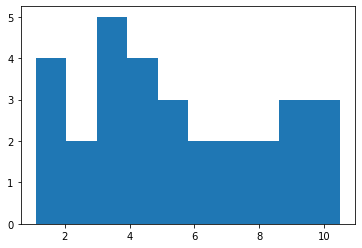

In [14]:
plt.hist(sal.Year_exp)

{'whiskers': [<matplotlib.lines.Line2D at 0x228c37de388>,
 'caps': [<matplotlib.lines.Line2D at 0x228c37dec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x228c257d188>],
 'medians': [<matplotlib.lines.Line2D at 0x228c37e3c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x228c37e9a48>],
 'means': []}

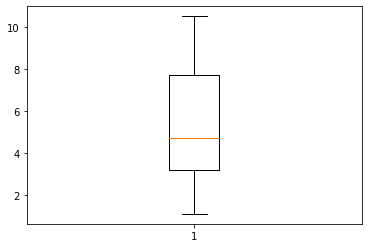

In [15]:
plt.boxplot(sal.Year_exp)

In [16]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

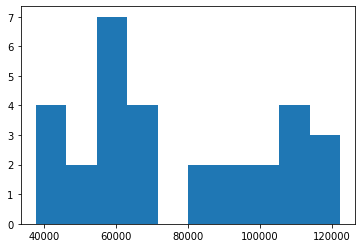

In [17]:
plt.hist(sal.Salr)

{'whiskers': [<matplotlib.lines.Line2D at 0x228c38d2a48>,
 'caps': [<matplotlib.lines.Line2D at 0x228c38d7a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x228c38cef88>],
 'medians': [<matplotlib.lines.Line2D at 0x228c38dc988>],
 'fliers': [<matplotlib.lines.Line2D at 0x228c38dcac8>],
 'means': []}

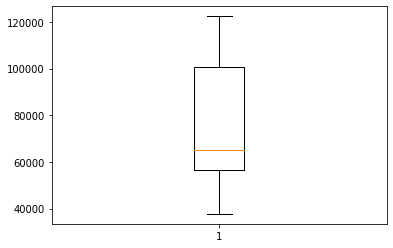

In [18]:
plt.boxplot(sal.Salr)

In [19]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

Text(0, 0.5, 'Salary')

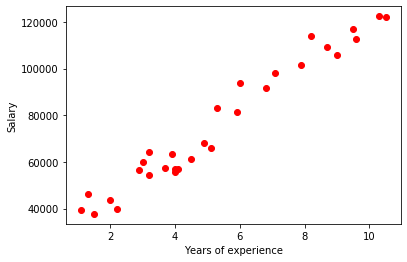

In [20]:
plt.plot(sal.Year_exp, sal.Salr, "ro"); plt.xlabel("Years of experience"); plt.ylabel("Salary")
# plot showing the relation between dependent and independent variables

In [21]:
sal.Salr.corr(sal.Year_exp)    # checking the correlation between the dependent and independent variables

0.9782416184887598

In [22]:
# For preparing linear regression model importing the statsmodels.formula.api

In [23]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols("Salr~Year_exp", data=sal).fit()

In [25]:
model.params

Intercept    25792.200199
Year_exp      9449.962321
dtype: float64

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Salr   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.14e-20
Time:                        00:00:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Year_exp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(model.conf_int(0.05))

                      0             1
Intercept  21136.061314  30448.339084
Year_exp    8674.118747  10225.805896


In [28]:
# Predicting the values using the model

In [29]:
pred = model.predict(sal.Year_exp)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0, 0.5, 'Salary')

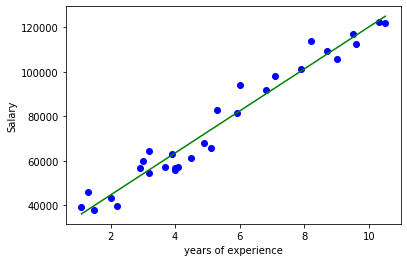

In [30]:
plt.scatter(sal.Year_exp, sal.Salr, c="b"); plt.plot(sal.Year_exp, pred, c="g");plt.xlabel("years of experience");plt.ylabel("Salary")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [31]:
pred.corr(sal.Salr)

0.9782416184887597

In [32]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [33]:
model2 = smf.ols("Salr~np.log(Year_exp)", data=sal).fit()

In [34]:
model2.params

Intercept           14927.97177
np.log(Year_exp)    40581.98796
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Salr   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.25e-13
Time:                        00:00:09   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Year_exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(model2.conf_int(0.05))

                             0             1
Intercept          4365.921305  25490.022235
np.log(Year_exp)  34083.511736  47080.464184


In [37]:
# Predicting the values using the model

In [38]:
pred2 = model2.predict(sal.Year_exp)
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'Salary')

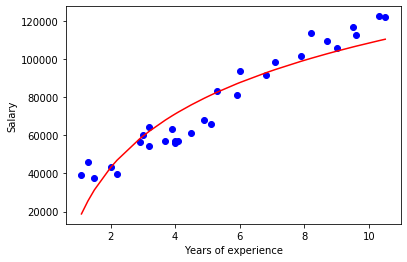

In [39]:
plt.scatter(sal.Year_exp, sal.Salr, c="b"); plt.plot(sal.Year_exp, pred2, c="r");plt.xlabel("Years of experience");plt.ylabel("Salary")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [40]:
pred2.corr(sal.Salr)

0.9240610817882641

In [41]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [42]:
model3 = smf.ols("np.log(Salr)~Year_exp", data=sal).fit()

In [43]:
model3.params

Intercept    10.507402
Year_exp      0.125453
dtype: float64

In [44]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(Salr)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           7.03e-18
Time:                        00:00:10   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Year_exp       0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(model3.conf_int(0.05))

                   0          1
Intercept  10.428656  10.586148
Year_exp    0.112332   0.138574


In [46]:
# Predicting the values using the model

In [47]:
pred_log = model3.predict(sal.Year_exp)

In [48]:
pred3 = np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

Text(0, 0.5, 'Salary')

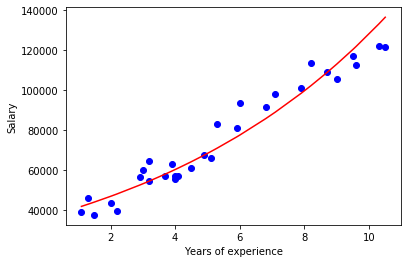

In [49]:
plt.scatter(sal.Year_exp, sal.Salr, c="b");plt.plot(sal.Year_exp, pred3, c="r");plt.xlabel("Years of experience");plt.ylabel("Salary")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [50]:
pred3.corr(sal.Salr)

0.9660469705377085

In [51]:
sal["Year_exp_sq"] = sal.Year_exp*sal.Year_exp

In [52]:
# bulinding another model(quadratic) to check whether the R_square value can be increased

In [53]:
model4 = smf.ols("np.log(Salr) ~ Year_exp + Year_exp_sq", data = sal).fit()

In [54]:
model4.params

Intercept      10.336852
Year_exp        0.202382
Year_exp_sq    -0.006614
dtype: float64

In [55]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(Salr)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.95e-18
Time:                        00:00:11   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3369      0.067    154.368      0.000      10.199      10.474
Year_exp        0.2024      0.027      7.601      0.000       0.148       0.257
Year_exp_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(model4.conf_int(0.05))

                     0          1
Intercept    10.199456  10.474247
Year_exp      0.147751   0.257012
Year_exp_sq  -0.011202  -0.002025


In [57]:
# Predicting the values using the model

In [58]:
pred_quad = model4.predict(sal)

In [59]:
pred4 = np.exp(pred_quad)
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

Text(0, 0.5, 'Salary')

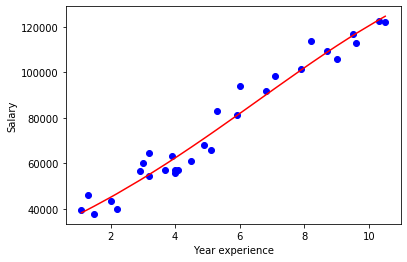

In [60]:
plt.scatter(sal.Year_exp, sal.Salr, c="b");plt.plot(sal.Year_exp, pred4, c="r");plt.xlabel("Year experience");plt.ylabel("Salary")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [61]:
pred4.corr(sal.Salr)

0.9798301486401543

In [62]:
# Creating the table of models and thier R_square values

In [63]:
data = {"Model":pd.Series(["model1_linear","model2_exponential","model3_exponential","model4_quadratic"]),"R_square_values":(0.957,0.854,0.932,0.949)}

In [64]:
table_rsquare = pd.DataFrame(data)
table_rsquare

,Model,R_square_values
0,model1_linear,0.957
1,model2_exponential,0.854
2,model3_exponential,0.932
3,model4_quadratic,0.949


In [65]:
# Out of all the 4 models, first model (linear model) has the highest R_square value, j=hence it is best fit model

In [66]:
std_resid = model.resid_pearson       # Calculating the standard residuals of the best model
std_resid

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

Text(0, 0.5, 'Standard residuals')

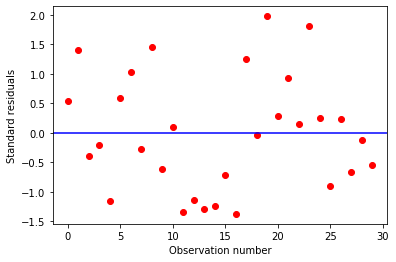

In [67]:
plt.plot(std_resid, "ro");plt.axhline(y=0, color="blue");plt.xlabel("Observation number");plt.ylabel("Standard residuals")
# plot showing the standard residuals v/s observed values

Text(0, 0.5, 'Actual')

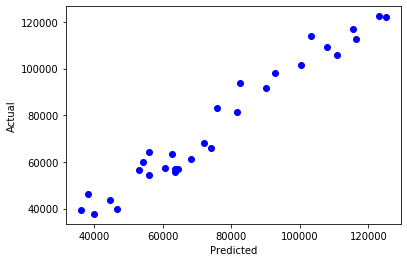

In [68]:
plt.scatter(pred, sal.Salr, color="blue"); plt.xlabel("Predicted"); plt.ylabel("Actual")
# plot showing the relation between the actual and predicted values of best fit model

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <a list of 10 Patch objects>)

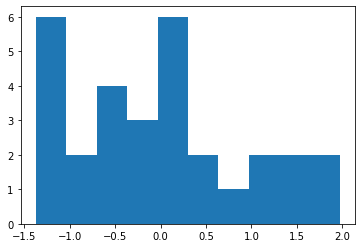

In [69]:
plt.hist(std_resid)             # histogram of standard residuals